# 4. Self Organizing Maps

### Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [31]:
dataset = pd.read_csv("/content/udemy_tensorflow/data/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


### Training the SOM

In [33]:
!pip install MiniSom

In [17]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.39293856959296997


### Visualizing the results

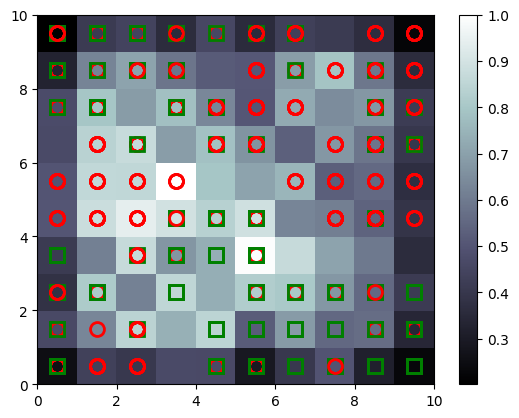

In [34]:
from pylab import bone, pcolor, colorbar, show, plot
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize=10, markeredgewidth=2)
show()

### Finding the frauds

In [35]:
mapping = som.win_map(X)
frauds = np.concatenate((mapping[(8,1)], mapping[(6,8)]), axis=0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5689781e+07 1.0000000e+00 3.9250000e+01 9.5000000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 6.5000000e+00 1.0000000e+00 1.0000000e+00
  1.4000000e+01 0.0000000e+00 2.0000000e+00 2.4000000e+02 4.6080000e+03]
 [1.5735837e+07 1.0000000e+00 5.2500000e+01 6.5000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 6.2900000e+00 1.0000000e+00 1.0000000e+00
  1.5000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.1203000e+04]
 [1.5778290e+07 1.0000000e+00 2.5000000e+01 1.1250000e+01 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.5000000e+00 1.0000000e+00 1.0000000e+00
  1.7000000e+01 0.0000000e+00 2.0000000e+00 2.0000000e+02 1.2090000e+03]
 [1.5799785e+07 1.0000000e+00 5.6420000e+01 2.8000000e+01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 2.8500000e+01 1.0000000e+00 1.0000000e+00
  4.0000000e+01 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.6000000e+01]
 [1.5766663e+07 1.0000000e+00 5.3920000e+01 9.6250000e+00 2.0000000e+00
  1.0000000e+01 4.0000000e+00 8.6650000e+00 1.0000000e+00 1.